In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter,NullFormatter

In [3]:
#results_d_best,results_d_best_best=pickle.load(open('simulations_all_results_filtered_6Nov2019.pkl','rb'))
#results_d_best,results_d_best_best=pickle.load(open('simulations_all_results_filtered_10Nov2019.pkl','rb'))

'''
results_d_best is a dictionary indexed by d, h, and the sat
configs. It contains all sat configs that did not have any time gaps
in 24 hours.

results_d_best_best is a dictionary indexed by d and h. It contains
the sat config with the least number of sats such that there is no
time gap in 24 hours.
'''

results_d_best,results_d_best_best=pickle.load(open('simulations_all_results_filtered_12Nov2019.pkl','rb'))

In [4]:
H=list(results_d_best_best[1000].keys()) # List of altitudes
D=list(results_d_best_best.keys()) # List of distances

In [5]:
results_d_best[1000][1500]

{(8, 11): (0, nan, 61.91345740290902, 1055.6873647295852),
 (9, 10): (0, nan, 62.497791047112926, 1037.848558465767),
 (7, 13): (0, nan, 61.279012788746776, 1109.602774273449),
 (5, 13): (0, nan, 64.08437937395267, 823.5150970474767),
 (10, 10): (0, nan, 62.16240095328473, 1101.8542442883618),
 (7, 15): (0, nan, 60.436198376166686, 1240.2179603618358),
 (8, 8): (0, nan, 66.11406415255145, 774.735960179369),
 (9, 8): (0, nan, 65.6381679067673, 836.1725593259843),
 (7, 14): (0, nan, 60.844168331635984, 1175.654300191635),
 (10, 15): (0, nan, 58.89764531842556, 1573.968701521168),
 (8, 10): (0, nan, 62.9646400715336, 961.4806173397059),
 (9, 9): (0, nan, 63.605786775016725, 946.696178692763),
 (8, 9): (0, nan, 64.09634508404375, 874.8217199210383),
 (15, 15): (0, nan, 58.03935804680497, 1857.9392454345357),
 (20, 20): (0, nan, 56.5038414877849, 2391.217627228053),
 (10, 14): (0, nan, 59.32766874772858, 1488.378222060431),
 (16, 16): (0, nan, 57.66041625441407, 1972.5087952102367)}

In [17]:
N={}  # Least number of satellites (as a list as a function of h)
R={}  # Rates (as a list as a function of h, corresponding to the least number of satellites)
L={}  # Loss (as a list as a function of h, corresponding to the least number of satellites)
for d in D:
    N[d]=[]
    R[d]=[]
    L[d]=[]
    for h in H:
        if not results_d_best_best[d][h]:
            N[d].append(None)
            R[d].append(None)
            L[d].append(None)
        else:
            N[d].append(np.prod(list(results_d_best_best[d][h][0][0])))
            R[d].append(results_d_best_best[d][h][0][1][3])
            L[d].append(results_d_best_best[d][h][0][1][2])
    #N[d]=[np.prod(list(results_d_best_best[d][h][0][0])) for h in H]

In [65]:
###################
### Unnecessary
###################

#cost={} # Cost function (as a dictionary, for all d, h, and sat configs)
#Rates={} # Rates (as a dictionary, for all d, h, and sat configs)
#FOM={} # Rate per satellite (as a dictionary, for all d, h, and sat configs)

#for d in D:
#    cost[d]={}
#    Rates[d]={}
#    FOM[d]={}
#    for h in H:
#        cost[d][h]={}
#        Rates[d][h]={}
#        FOM[d][h]={}
#        for sat_config in results_d_best[d][h].keys():
#            n=np.prod(list(sat_config))
#            cost[d][h][sat_config]=n*results_d_best[d][h][sat_config][2]
#            Rates[d][h][sat_config]=results_d_best[d][h][sat_config][3]
#            FOM[d][h][sat_config]=results_d_best[d][h][sat_config][3]/n

In [18]:
def calculate_cost(d,h,alpha=1):
    
    '''
    For a given d and h, returns a dictionary indexed by sat configs
    that contains the cost function. Also returns the minimum value
    of the cost function among all available sat configs.
    '''
    
    C={}
    
    for sat_config in results_d_best[d][h].keys():
        n=np.prod(list(sat_config))
        eta=results_d_best[d][h][sat_config][2]
        C[sat_config]=n**(1/alpha)*eta
        
    return C,min(C.values())
    
    

In [19]:
def calculate_FOM(d,h):
    
    '''
    For a given d and h, returns a dictionary indexed by sat configs
    that contains the figure of merit (rate divided by total number
    of satellites). Also returns the maximum value of the figure of
    merit among all available sat configs, and the sat config that
    achieves the maximum.
    '''
    
    F={}
    
    for sat_config in results_d_best[d][h].keys():
        n=np.prod(list(sat_config))
        r=results_d_best[d][h][sat_config][3]
        F[sat_config]=r/n
        
    if not F:
        m=None
        s=None
    else:
        Fval=np.array(list(F.values()))
        Fkey=list(F.keys())
        m=max(Fval)
        i=np.argwhere(Fval==m)[0][0]
        s=Fkey[i]
    
    return F,m,s

In [20]:
calculate_FOM(1500,2000)

({(9, 7): 4.734294773638047,
  (8, 7): 4.994670882139546,
  (8, 11): 4.808361934994466,
  (9, 10): 4.569731998986666,
  (7, 13): 4.887605492966525,
  (5, 13): 5.296475842070921,
  (4, 13): 5.375192931791899,
  (10, 10): 4.291284002695677,
  (6, 8): 5.4842474752172885,
  (7, 8): 5.22983572446139,
  (7, 15): 4.643777655288339,
  (8, 8): 4.939692398444129,
  (9, 8): 4.640632208936729,
  (7, 14): 4.761404296297973,
  (10, 15): 3.8846119952495566,
  (8, 10): 4.857968891865125,
  (9, 9): 4.671260307755272,
  (8, 9): 4.953990968855411,
  (15, 15): 2.8949390927261303,
  (20, 20): 1.9523292169810889,
  (10, 14): 3.97449758739912,
  (16, 16): 2.6574234054306722},
 5.4842474752172885,
 (6, 8))

In [21]:
calculate_FOM(1500,2000)[1]

5.4842474752172885

In [22]:
def calculate_rate(d,h):
    
    '''
    For a given d and h, returns a dictionary indexed by sat configs
    that contains the rate. Also returns the maximum rate among all
    available sat configs.
    '''
    
    R={}
    
    for sat_config in results_d_best[d][h].keys():
        R[sat_config]=results_d_best[d][h][sat_config][3]
        
    if not R:
        m=None
    else:
        m=max(R.values())
    
    return R,m
    

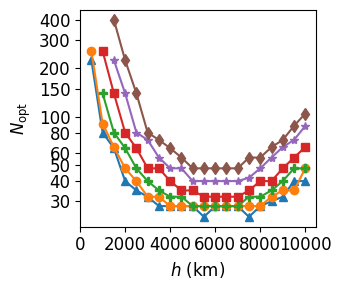

In [23]:
fig=plt.figure(figsize=(3.5,3))

ax=fig.add_subplot(111)

ax.plot(H,N[500],linestyle='-',marker='^',label=r'$d=500$ km')
ax.plot(H,N[1500],linestyle='-',marker='o',label=r'$d=1500$ km')
ax.plot(H,N[2500],linestyle='-',marker='P',label=r'$d=2500$ km')
ax.plot(H,N[3500],linestyle='-',marker='s',label=r'$d=3500$ km')
ax.plot(H,N[4500],linestyle='-',marker='*',label=r'$d=4500$ km')
ax.plot(H,N[5000],linestyle='-',marker='d',label=r'$d=5000$ km')

ax.set_yscale('log')
ax.get_yaxis().set_minor_formatter(NullFormatter())
ax.set_yticks([30,40,50,60,80,100,150,200,300,400])
ax.get_yaxis().set_major_formatter(ScalarFormatter())
ax.minorticks_off()

plt.xticks([0,2000,4000,6000,8000,10000],fontsize=12)
plt.yticks(fontsize=12)

ax.set_xlabel('$h$ (km)',fontsize=12)
ax.set_ylabel('$N_{\mathrm{opt}}$',fontsize=12)

    
#plt.ylim([20,100])
    
#ax.grid()

#plt.legend(fontsize=12)

plt.tight_layout()

#plt.savefig('simulations_all_numSats_13Nov2019.pdf',bbox_inches='tight')
plt.savefig('simulations_all_numSats_22July2020.pdf',bbox_inches='tight')

plt.show()



In [24]:
F_500=[calculate_FOM(500,h)[1] for h in H]
F_1000=[calculate_FOM(1000,h)[1] for h in H]
F_1500=[calculate_FOM(1500,h)[1] for h in H]
F_2000=[calculate_FOM(2000,h)[1] for h in H]
F_2500=[calculate_FOM(2500,h)[1] for h in H]
F_3000=[calculate_FOM(3000,h)[1] for h in H]
F_3500=[calculate_FOM(3500,h)[1] for h in H]
F_4000=[calculate_FOM(4000,h)[1] for h in H]
F_4500=[calculate_FOM(4500,h)[1] for h in H]
F_5000=[calculate_FOM(5000,h)[1] for h in H]


S_500=[calculate_FOM(500,h)[2] for h in H]
S_1000=[calculate_FOM(1000,h)[2] for h in H]
S_1500=[calculate_FOM(1500,h)[2] for h in H]
S_2000=[calculate_FOM(2000,h)[2] for h in H]
S_2500=[calculate_FOM(2500,h)[2] for h in H]
S_3000=[calculate_FOM(3000,h)[2] for h in H]
S_3500=[calculate_FOM(3500,h)[2] for h in H]
S_4000=[calculate_FOM(4000,h)[2] for h in H]
S_4500=[calculate_FOM(4500,h)[2] for h in H]
S_5000=[calculate_FOM(5000,h)[2] for h in H]


In [25]:
calculate_FOM(5000,3500)

({(8, 11): 0.15436350694594195,
  (9, 10): 0.148756753072558,
  (7, 13): 0.15223161463714818,
  (10, 10): 0.1380985680633783,
  (7, 15): 0.1391883728297985,
  (9, 8): 0.15830902422203008,
  (7, 14): 0.14548744891951593,
  (10, 15): 0.1111021938221784,
  (8, 10): 0.16037058837026016,
  (9, 9): 0.15538897807581517,
  (8, 9): 0.1671425572562334,
  (15, 15): 0.07945768049625494,
  (20, 20): 0.049097622724797424,
  (10, 14): 0.11612812227786236,
  (16, 16): 0.07154089388325321},
 0.1671425572562334,
 (8, 9))

In [15]:
results_d_best[5000][2500]

{(10, 15): (0, nan, 77.97854447886318, 16.932949875607026),
 (15, 15): (0, nan, 77.31151242884508, 19.243248539689358),
 (20, 20): (0, nan, 76.56991156418151, 22.275157267503968),
 (10, 14): (0, nan, 78.188919567789, 16.33904727315887),
 (16, 16): (0, nan, 77.1107357055575, 19.99888092964923)}

In [27]:
R_5000

[None,
 None,
 5.45991028072597,
 13.514176472707037,
 16.33904727315887,
 13.272531505602815,
 12.034264122448805,
 9.981718961586,
 8.092470188211829,
 6.428567288690679,
 5.377419857258743,
 4.4876937553446625,
 3.733588898443565,
 3.1081870590676854,
 2.6958633972395183,
 2.261468184484119,
 1.988536012314553,
 1.7112331314164215,
 1.522114327379968,
 1.3278095366368694]

In [26]:
R_500=[]
R_1000=[]
R_1500=[]
R_2000=[]
R_2500=[]
R_3000=[]
R_3500=[]
R_4000=[]
R_4500=[]
R_5000=[]


for i in range(len(H)):
    if S_500[i]==None:
        R_500.append(None)
    else:
        R_500.append(results_d_best[500][H[i]][S_500[i]][3])
        
    if S_1000[i]==None:
        R_1000.append(None)
    else:
        R_1000.append(results_d_best[1000][H[i]][S_1000[i]][3])
        
    if S_1500[i]==None:
        R_1500.append(None)
    else:
        R_1500.append(results_d_best[1500][H[i]][S_1500[i]][3])

    if S_2000[i]==None:
        R_2000.append(None)
    else:
        R_2000.append(results_d_best[2000][H[i]][S_2000[i]][3])
        
    if S_2500[i]==None:
        R_2500.append(None)
    else:
        R_2500.append(results_d_best[2500][H[i]][S_2500[i]][3])
        
    if S_3000[i]==None:
        R_3000.append(None)
    else:
        R_3000.append(results_d_best[3000][H[i]][S_3000[i]][3])
        
    if S_3500[i]==None:
        R_3500.append(None)
    else:
        R_3500.append(results_d_best[3500][H[i]][S_3500[i]][3])
        
    if S_4000[i]==None:
        R_4000.append(None)
    else:
        R_4000.append(results_d_best[4000][H[i]][S_4000[i]][3])
        
    if S_4500[i]==None:
        R_4500.append(None)
    else:
        R_4500.append(results_d_best[4500][H[i]][S_4500[i]][3])
        
    if S_5000[i]==None:
        R_5000.append(None)
    else:
        R_5000.append(results_d_best[5000][H[i]][S_5000[i]][3])


#R_500=[results_d_best[500][H[i]][S_500[i]][3] for i in range(len(H))]
#R_1000=[results_d_best[1000][H[i]][S_1000[i]][3] for i in range(len(H))]
#R_1500=[results_d_best[1500][H[i]][S_1500[i]][3] for i in range(len(H))]
#R_2000=[results_d_best[2000][H[i]][S_2000[i]][3] for i in range(len(H))]
#R_2500=[results_d_best[2500][H[i]][S_2500[i]][3] for i in range(len(H))]
#R_3000=[results_d_best[3000][H[i]][S_3000[i]][3] for i in range(len(H))]
#R_3500=[results_d_best[3500][H[i]][S_3500[i]][3] for i in range(len(H))]
#R_4000=[results_d_best[4000][H[i]][S_4000[i]][3] for i in range(len(H))]
#R_4500=[results_d_best[4500][H[i]][S_4500[i]][3] for i in range(len(H))]
#R_5000=[results_d_best[5000][H[i]][S_5000[i]][3] for i in range(len(H))]


In [32]:
Rmax_2500

[None,
 571.4252314957752,
 556.4915348923456,
 370.8203012085401,
 229.73275978925835,
 143.04943475525812,
 91.47224244265966,
 60.39003948467143,
 41.12584655025063,
 28.81717333346256,
 20.715820289001456,
 15.234343519834404,
 11.430711561886422,
 8.734087749337089,
 6.780533984731306,
 5.339126777617509,
 4.2592518105944235,
 3.437931550984498,
 2.8037831224821,
 2.3088864761890853]

In [49]:
R[2500]

[None,
 330.585852283471,
 250.412465075859,
 158.25472067616346,
 96.19216616888207,
 60.32007118000457,
 38.760784667681904,
 26.769014902314765,
 19.8860752368489,
 13.66491853812878,
 10.48188993873453,
 8.12248605051781,
 6.364916440278965,
 5.067868583485001,
 4.341906941966005,
 3.516697806514129,
 2.9242879344609247,
 2.545620924084799,
 2.1887378204202053,
 1.826737809254417]

In [29]:
R_1500

[2357.9055618157777,
 1321.3209210541258,
 592.8822536776174,
 263.24387881042986,
 141.07628134314896,
 75.92974096498314,
 51.18316227563619,
 32.04493818533612,
 23.046063485184252,
 16.987030470141388,
 12.711331754326638,
 9.682326948500362,
 7.4732828131578914,
 5.864520972696992,
 4.671511853079749,
 3.7532854812098093,
 3.2375877695270794,
 2.6967942168077568,
 2.216510767266936,
 2.0157267821995224]

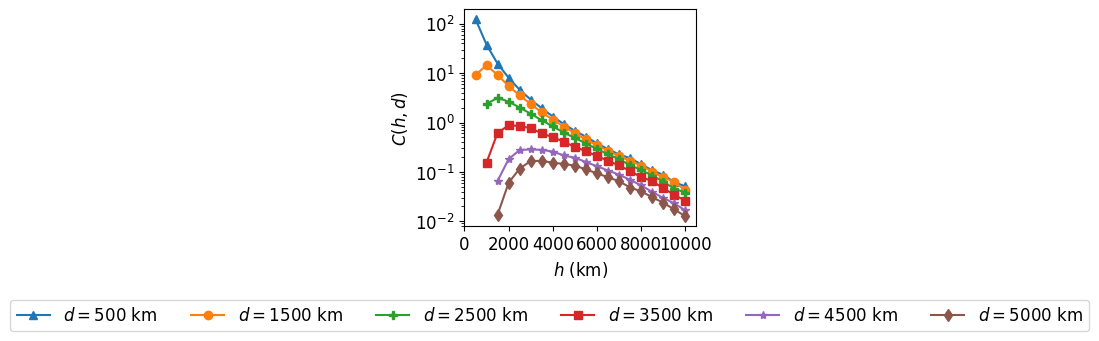

In [33]:
fig=plt.figure(figsize=(3.5,3))

plt.semilogy(H,F_500,linestyle='-',marker='^',label=r'$d=500$ km')
plt.semilogy(H,F_1500,linestyle='-',marker='o',label=r'$d=1500$ km')
plt.semilogy(H,F_2500,linestyle='-',marker='P',label=r'$d=2500$ km')
#plt.semilogy(H,F_3000,linestyle='-',marker='P',label=r'$d=3000$ km')
plt.semilogy(H,F_3500,linestyle='-',marker='s',label=r'$d=3500$ km')
plt.semilogy(H,F_4500,linestyle='-',marker='*',label=r'$d=4500$ km')
plt.semilogy(H,F_5000,linestyle='-',marker='d',label=r'$d=5000$ km')

plt.xlabel('$h$ (km)',fontsize=12)
plt.ylabel('$C(h,d)$',fontsize=12)

plt.xlim([0,10500])

plt.xticks([0,2000,4000,6000,8000,10000],fontsize=12)
plt.yticks(fontsize=12)

#plt.legend(fontsize=12)
fig.legend(ncol=6,loc='lower center',bbox_to_anchor = (0.0,-0.15,1,1),bbox_transform = plt.gcf().transFigure,fontsize=12)

plt.tight_layout()

plt.savefig('simulations_all_FOM_22July2020.pdf',bbox_inches='tight')

plt.show()


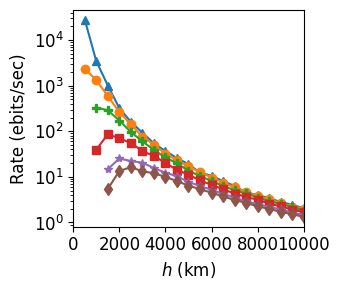

In [34]:
'''
Rates corresponding to points in the plot above for C(h,d).
'''

fig=plt.figure(figsize=(3.5,3))

#for d in D[9::10]:
#    plt.semilogy(H,R[d],linestyle='-',marker='o',label='$d=$ '+str(d)+' km')

plt.semilogy(H,R_500,linestyle='-',marker='^',label='$d=500$ km')
plt.semilogy(H,R_1500,linestyle='-',marker='o',label='$d=1500$ km')
plt.semilogy(H,R_2500,linestyle='-',marker='P',label='$d=2500$ km')
plt.semilogy(H,R_3500,linestyle='-',marker='s',label='$d=3500$ km')
plt.semilogy(H,R_4500,linestyle='-',marker='*',label='$d=4500$ km')
plt.semilogy(H,R_5000,linestyle='-',marker='d',label='$d=5000$ km')

plt.xlim([0,10000])

plt.xlabel('$h$ (km)',fontsize=12)
plt.ylabel('Rate (ebits/sec)',fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#plt.ticklabel_format(axis='x',style='sci',scilimits=(0,0))

    
#plt.grid()

#plt.legend()

#fig.legend(ncol=1,loc='upper right',bbox_to_anchor = (0.37,-0.021,1,1),bbox_transform = plt.gcf().transFigure,fontsize=12)


plt.tight_layout()

#plt.savefig('simulations_all_rate_13Nov2019.pdf',bbox_inches='tight')
plt.savefig('simulations_all_rateFOM_23July2020.pdf',bbox_inches='tight')


plt.show()



In [50]:
Rmax_500=[calculate_rate(500,h)[1] for h in H]
Rmax_1000=[calculate_rate(1000,h)[1] for h in H]
Rmax_1500=[calculate_rate(1500,h)[1] for h in H]
Rmax_2000=[calculate_rate(2000,h)[1] for h in H]
Rmax_2500=[calculate_rate(2500,h)[1] for h in H]
Rmax_3000=[calculate_rate(3000,h)[1] for h in H]
Rmax_3500=[calculate_rate(3500,h)[1] for h in H]
Rmax_4000=[calculate_rate(4000,h)[1] for h in H]
Rmax_4500=[calculate_rate(4500,h)[1] for h in H]
Rmax_5000=[calculate_rate(5000,h)[1] for h in H]


Rmax_3000


[None,
 190.1504637500038,
 284.10826596307885,
 230.85503699136106,
 160.4594684660186,
 107.59131730188298,
 72.3886625082752,
 49.57232500650072,
 34.69411372245066,
 24.826434956462926,
 18.14472583160117,
 13.522263938547049,
 10.25716832186368,
 7.908568847042625,
 6.1865406751313765,
 4.903064382286301,
 3.9332307312814083,
 3.190156013946084,
 2.6127360192978752,
 2.1595918093683033]

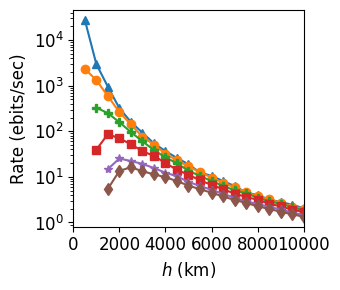

In [36]:
'''
Rates corresponding to (d,h) pairs with the fewest satellites needed
for continuous global coverage over 24 hours.
'''


fig=plt.figure(figsize=(3.5,3))


#for d in D[9::10]:
#    plt.semilogy(H,R[d],linestyle='-',marker='o',label='$d=$ '+str(d)+' km')

plt.semilogy(H,R[500],linestyle='-',marker='^',label='$d=500$ km')
plt.semilogy(H,R[1500],linestyle='-',marker='o',label='$d=1500$ km')
#plt.semilogy(H,R[2000],linestyle='-',marker='o',label='$d=2000$ km')
plt.semilogy(H,R[2500],linestyle='-',marker='P',label='$d=2500$ km')
#plt.semilogy(H,R[3000],linestyle='-',marker='s',label='$d=3000$ km')
plt.semilogy(H,R[3500],linestyle='-',marker='s',label='$d=3500$ km')
#plt.semilogy(H,R[4000],linestyle='-',marker='*',label='$d=4000$ km')
plt.semilogy(H,R[4500],linestyle='-',marker='*',label='$d=4500$ km')
plt.semilogy(H,R[5000],linestyle='-',marker='d',label='$d=5000$ km')

plt.xlim([0,10000])

plt.xlabel('$h$ (km)',fontsize=12)
plt.ylabel('Rate (ebits/sec)',fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#plt.ticklabel_format(axis='x',style='sci',scilimits=(0,0))

    
#plt.grid()

#plt.legend()

#fig.legend(ncol=1,loc='upper right',bbox_to_anchor = (0.37,-0.021,1,1),bbox_transform = plt.gcf().transFigure,fontsize=12)


plt.tight_layout()

#plt.savefig('simulations_all_rate_13Nov2019.pdf',bbox_inches='tight')
plt.savefig('simulations_all_rate_21July2020.pdf',bbox_inches='tight')


plt.show()



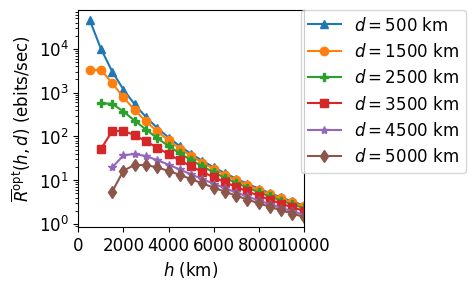

In [37]:
'''
Maximum rates for (d,h) pairs among all sat configs tested.
'''

fig=plt.figure(figsize=(3.5,3))


#for d in D[9::10]:
#    plt.semilogy(H,R[d],linestyle='-',marker='o',label='$d=$ '+str(d)+' km')

plt.semilogy(H,Rmax_500,linestyle='-',marker='^',label='$d=500$ km')
plt.semilogy(H,Rmax_1500,linestyle='-',marker='o',label='$d=1500$ km')
#plt.semilogy(H,R[2000],linestyle='-',marker='o',label='$d=2000$ km')
plt.semilogy(H,Rmax_2500,linestyle='-',marker='P',label='$d=2500$ km')
#plt.semilogy(H,R[3000],linestyle='-',marker='s',label='$d=3000$ km')
plt.semilogy(H,Rmax_3500,linestyle='-',marker='s',label='$d=3500$ km')
#plt.semilogy(H,R[4000],linestyle='-',marker='*',label='$d=4000$ km')
plt.semilogy(H,Rmax_4500,linestyle='-',marker='*',label='$d=4500$ km')
plt.semilogy(H,Rmax_5000,linestyle='-',marker='d',label='$d=5000$ km')

plt.xlim([0,10000])

plt.xlabel('$h$ (km)',fontsize=12)
plt.ylabel('$\overline{R}^{\mathrm{opt}}(h,d)$ (ebits/sec)',fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#plt.ticklabel_format(axis='x',style='sci',scilimits=(0,0))

    
#plt.grid()

#plt.legend(fontsize=12)

fig.legend(ncol=1,loc='upper right',bbox_to_anchor = (0.37,-0.021,1,1),bbox_transform = plt.gcf().transFigure,fontsize=12)


plt.tight_layout()

#plt.savefig('simulations_all_rate_13Nov2019.pdf',bbox_inches='tight')
plt.savefig('simulations_all_rateMax_22July2020.pdf',bbox_inches='tight')


plt.show()



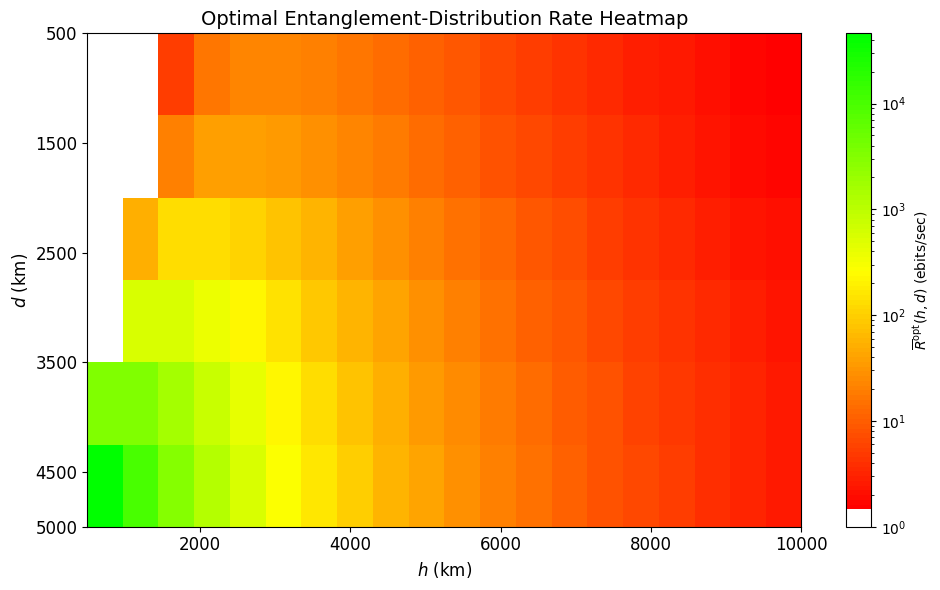

In [59]:
from matplotlib.colors import LogNorm, LinearSegmentedColormap

distances = [500, 1500, 2500, 3500, 4500, 5000]

# Replace None with np.nan and convert to numpy arrays
def replace_none_with_nan(arr):
    return np.array([np.nan if x is None else x for x in arr], dtype=float)

# Combine data into a 2D array
rates = np.array([Rmax_500, Rmax_1500, Rmax_2500, Rmax_3500, Rmax_4500, Rmax_5000], dtype=float)

# Set zero values to a small positive value for logarithmic scaling, but treat them as zero
zero_threshold = 1e-10
rates[rates == 0] = zero_threshold

# Ensure vmin and vmax are valid for LogNorm
vmin = np.nanmin(rates[rates > zero_threshold])
vmax = np.nanmax(rates)

# Create a custom colormap from red to yellow to green
colors = [(1, 0, 0), (1, 1, 0), (0, 1, 0)]  # Red to yellow to green
n_bins = 100  # Number of bins
cmap_name = 'red_yellow_green'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Create the heatmap with a logarithmic color scale
plt.figure(figsize=(10, 6))
plt.imshow(rates, aspect='auto', cmap=cm, extent=[H[0], H[-1], distances[-1], distances[0]], origin='lower', norm=LogNorm(vmin=vmin, vmax=vmax))
cbar = plt.colorbar(label='$\overline{R}^{\mathrm{opt}}(h,d)$ (ebits/sec)')
cbar.set_ticks([10**i for i in range(int(np.log10(vmin)), int(np.log10(vmax)) + 1)])
cbar.set_ticklabels([f'$10^{i}$' for i in range(int(np.log10(vmin)), int(np.log10(vmax)) + 1)])

# Configure the plot
plt.xlabel('$h$ (km)', fontsize=12)
plt.ylabel('$d$ (km)', fontsize=12)
plt.title('Optimal Entanglement-Distribution Rate Heatmap', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(distances, fontsize=12)

plt.tight_layout()
plt.savefig('heatmap_entanglement_distribution_rate.pdf', bbox_inches='tight')
plt.show()

In [38]:
###################################################
### This data needed for repeater comparison plot
###################################################

# Rates for varying distances when the altitude is fixed to 4000km
rates_h4000=[calculate_rate(d,4000)[1] for d in D[0:20]]

# Rates for varying distances when the altitude is fixed to 2000km
rates_h2000=[calculate_rate(d,2000)[1] for d in D[0:20]]

# Rates for varying distances when the altitude is fixed to 1500km
rates_h1500=[calculate_rate(d,1500)[1] for d in D[0:20]]

# Rates for varying distances when the altitude is fixed to 1000km
rates_h1000=[calculate_rate(d,1000)[1] for d in D[0:20]]

# Rates for varying distances when the altitude is fixed to 500km
rates_h500=[calculate_rate(d,500)[1] for d in D[0:20]]

In [39]:
Rmax_5000

[None,
 None,
 5.45991028072597,
 16.63869564334161,
 22.275157267503968,
 22.274418496609137,
 19.63904908991897,
 16.338434157334518,
 13.23415601888041,
 10.60558471681277,
 8.480630946975307,
 6.797914816592543,
 5.475639105199856,
 4.439211589720682,
 3.623341906406818,
 2.9779679155962566,
 2.4651473447570806,
 2.0548996122661194,
 1.723893228784933,
 1.4555005577640727]

In [40]:
R_5000

[None,
 None,
 5.45991028072597,
 13.514176472707037,
 16.33904727315887,
 13.272531505602815,
 12.034264122448805,
 9.981718961586,
 8.092470188211829,
 6.428567288690679,
 5.377419857258743,
 4.4876937553446625,
 3.733588898443565,
 3.1081870590676854,
 2.6958633972395183,
 2.261468184484119,
 1.988536012314553,
 1.7112331314164215,
 1.522114327379968,
 1.3278095366368694]

In [41]:
results_d_best[5000][2000][(20,20)][3]

16.63869564334161

In [56]:
############################################################################################################
### Transmittance and Loss over 24 hours for d=1000 km and h=1500 km for a (9,10) satellite configuration
############################################################################################################

In [42]:
Eta,Loss,D1,D2=pickle.load(open('sample_data_24July2020.pkl','rb'))

FileNotFoundError: [Errno 2] No such file or directory: 'sample_data_24July2020.pkl'

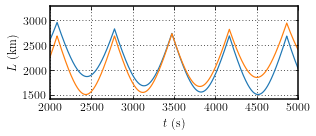

In [139]:
plt.figure(figsize=(4.5,2))

plt.plot(range(86401),np.array(D1)/1000)
plt.plot(range(86401),np.array(D2)/1000)

plt.xlabel(r'$t$ (s)',fontsize=12)
plt.ylabel(r'$L$ (km)',fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlim([2000,5000])

plt.tight_layout()

plt.savefig('sample_data_1_24July2020.pdf',bbox_inches='tight')

plt.show()

In [149]:
Rate=[]
for eta in Eta:
    Rate.append(np.random.binomial(1e9,eta))

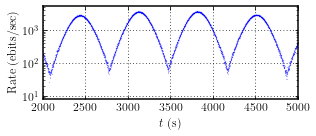

In [154]:
plt.figure(figsize=(4.5,2))

plt.semilogy(range(86401),Rate,'ob',markersize=0.1)

plt.xlabel(r'$t$ (s)',fontsize=12)
#plt.ylabel(r'$-10\log_{10}(\eta_{\mathrm{tot}}(t))$ (dB)')
plt.ylabel(r'Rate (ebits/sec)',fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlim([2000,5000])

plt.tight_layout()

plt.savefig('sample_data_2_24July2020.pdf',bbox_inches='tight')

plt.show()

In [148]:
np.random.binomial(1e9,1e-8)

13